In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import matplotlib as mpl
import time
import threading
import ipywidgets as widgets

In [2]:
space_dim = [30,70]

In [10]:
class Enemy(threading.Thread):
    activity_delay = 0.1
    born_count = 2
    
    def __new__(cls, energy, space):
        if len(np.transpose(np.where(space == 0))) == 0: return None
        else: return super().__new__(cls)
    
    def __init__(self, energy, space):
        self.thread = threading.Thread.__init__(self, name=energy)
        self.energy = energy
        aval_space = np.transpose(np.where(space == 0))
        self.position = aval_space[np.random.randint(len(aval_space))]
        #print(self.position)
        space[self.position[0], self.position[1]] = energy 
    
    def run(self):
        while (self.energy>0):
            time.sleep(self.activity_delay)
            self.energy -= 1
    
    def stop(self):
        self.thread.stop()

In [11]:
class Population:
    def __init__(self, energy, space_dim):
        self.space = np.zeros(shape=space_dim, dtype=int)
        self.enemys = np.array(Enemy(energy, self.space), dtype = Enemy)
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
    
    def life(self):
        for i in self.enemys:
            i.start()
            
           
    
    def del_enemy(self, enemy):
        self.space[enemy.position[0],enemy.position[1]] = 0
        self.enemys = np.delete(self.enemys, np.where(self.enemys == enemy))
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
        print(enemy.position)
       
    def new_enemy(self, energy):
        self.enemys = np.append(self.enemys, Enemy(energy, self.space))
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
        
    def view_space(self):
        %matplotlib inline
        cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['white','green','red'], 64)
        plt.figure(figsize=(25, 10))
        plt.imshow(self.space, clim=(0.0, 30.0), cmap=cmap)
        plt.colorbar()
        plt.pause(0.5)
        plt.show()
        clear_output(wait = True)

In [12]:

p1 = Population(1, space_dim)
for n in range(10):
    p1.new_enemy(500)
    #p1.enemys[n].start()

In [13]:
p1.life()
threading.active_count()

16

In [18]:
threading.active_count()

5

In [17]:
for f in range(10):
    plt.pause(0.5)
    clear_output(wait = True)
    print(p1.enemys[0].energy, p1.enemys[1].energy, p1.enemys[10].energy, p1.enemys[9].energy)

0 0 0 0


In [10]:
for t in threading.enumerate():
    print(t.name)
    if t.is_alive(): 
        print('Still running') 
    else: 
        print('Completed') 
    if (t.name == '5'): t.stop()


MainThread
Still running
Thread-2
Still running
Thread-3
Still running
IPythonHistorySavingThread
Still running
Thread-1
Still running
1
Still running
5
Still running


AttributeError: 'NoneType' object has no attribute 'stop'

In [8]:
threading.active_count()

16

In [45]:
p1.del_enemy(p1.enemys[1])

[ 1 23]


In [20]:
p1.enemys[3].position

array([4, 9])

In [50]:
 np.transpose(np.where(p1.space != 0))

array([[  1,  16],
       [ 69, 424],
       [123,  18],
       [251, 122]])

In [51]:
p1.enemys

array([<__main__.Enemy object at 0x7f6ac787b8>,
       <__main__.Enemy object at 0x7f6aae2a58>], dtype=object)

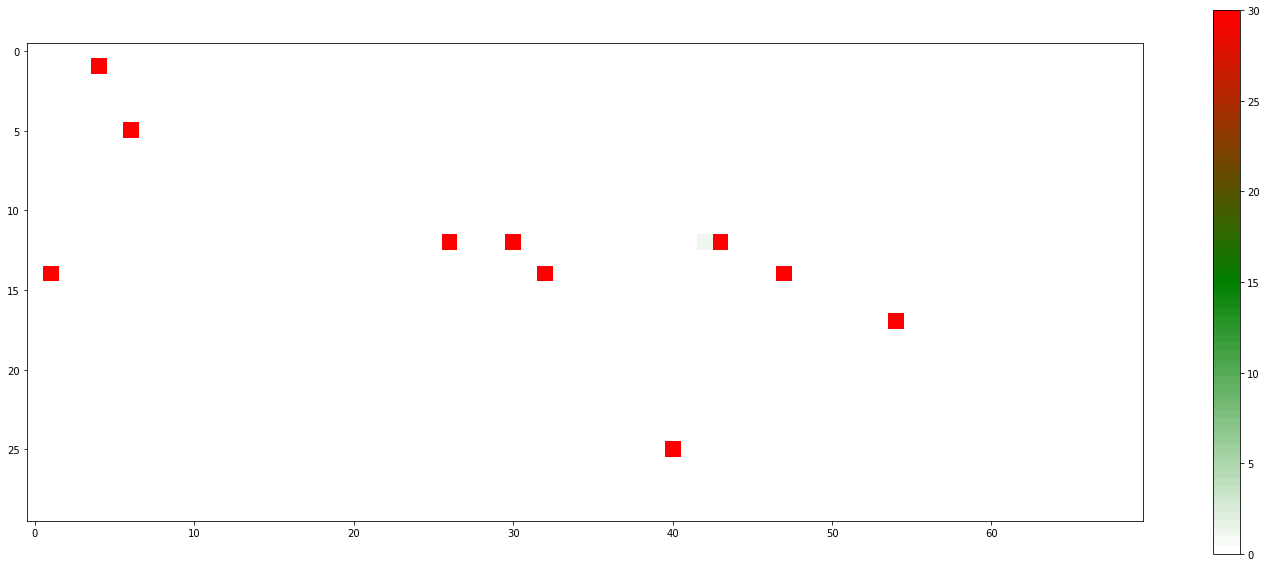

In [16]:
p1.view_space()

In [242]:
def set_n_Enemy(n):
    for i in range(n):
        enemys = np.append(enemys, Enemy(i, space))

start_time = time.time()
set_n_Enemy(100)       
print("--- %s seconds ---" % (time.time() - start_time))
print(len(enemys))
view_space()

UnboundLocalError: local variable 'enemys' referenced before assignment

In [172]:
def append_new_enemy():
    i = len(np.transpose(np.where(space == 0)))
    

In [85]:
len(np.transpose(np.nonzero(space)))

1353

In [89]:
len(np.transpose(np.where(space == 0)))

747